In [120]:
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.patches as patches
from plotly.subplots import make_subplots
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})

In [121]:
sar_race_2 = pd.read_csv('/Users/kushtrivedi/Desktop/NYRA/SAR/Jul/Day27/race2.csv')

In [122]:
sar_race_2.head().T

0                  1                  2  \
Unnamed: 0                           0                  1                  2   
track_id                           SAR                SAR                SAR   
race_date                   2019-07-27         2019-07-27         2019-07-27   
race_number                          2                  2                  2   
program_number                       1                  1                  1   
trakus_index                         1                  2                  3   
latitude                     43.069603          43.069606           43.06961   
longitude                   -73.769872         -73.769863         -73.769852   
course_type                          D                  D                  D   
track_condition                    FT                 FT                 FT    
run_up_distance                     45                 45                 45   
race_type                          MSW                MSW                MSW   
purse                            90000              90000              90000   
post_time                          136                136                136   
weight_carried                     119                119                119   
jockey               Javier Castellano  Javier Castellano  Javier Castellano   
american_odds                      270                270                270   
finishing_place                      2                  2                  2   
horse_name                Rapido Gatta       Rapido Gatta       Rapido Gatta   
furlongs                           6.0                6.0                6.0   
new_odds                         2.7-1              2.7-1              2.7-1   
implied_probability              27.03              27.03              27.03   
average_temperature               81.0               81.0               81.0   
rating                               9                  9                  9   
Time (Sec)                         0.0               0.25                0.5   
Speed (Mph)                        0.0           6.368325           7.991946   
Acceleration                       0.0          11.387584           2.903294   
Time_Took_1                   1.167628           1.167628           1.167628   
Time_Took                     1.167628           1.167628           1.167628   

                                     3                  4  
Unnamed: 0                           3                  4  
track_id                           SAR                SAR  
race_date                   2019-07-27         2019-07-27  
race_number                          2                  2  
program_number                       1                  1  
trakus_index                         4                  5  
latitude                     43.069614           43.06962  
longitude                    -73.76984         -73.769823  
course_type                          D                  D  
track_condition                    FT                 FT   
run_up_distance                     45                 45  
race_type                          MSW                MSW  
purse                            90000              90000  
post_time                          136                136  
weight_carried                     119                119  
jockey               Javier Castellano  Javier Castellano  
american_odds                      270                270  
finishing_place                      2                  2  
horse_name                Rapido Gatta       Rapido Gatta  
furlongs                           6.0                6.0  
new_odds                         2.7-1              2.7-1  
implied_probability              27.03              27.03  
average_temperature               81.0               81.0  
rating                               9                  9  
Time (Sec)                        0.75                1.0  
Speed (Mph)                   8.812066          12.699646  
Acceleration    

In [27]:
import math
x1 = 43.069568
y1 = -73.769843
x2 = 43.071586
y2 = -73.769792
d = math.sqrt(((x2-x1) ** 2) + ((y2-y1) ** 2))
d

0.0020186443470871984

In [123]:
javier_castellano = sar_race_2[(sar_race_2.jockey == 'Javier Castellano')]
dylan_davis = sar_race_2[(sar_race_2.jockey == 'Dylan Davis')]
tyler_gaffalione = sar_race_2[(sar_race_2.jockey == 'Tyler Gaffalione')]
junior_alvarado = sar_race_2[(sar_race_2.jockey == 'Junior Alvarado')]
jose_ortiz = sar_race_2[(sar_race_2.jockey == 'Jose L. Ortiz')]
joel_rosario = sar_race_2[(sar_race_2.jockey == 'Joel Rosario')]
manuel_franco = sar_race_2[(sar_race_2.jockey == 'Manuel Franco')]

In [29]:
javier_castellano.shape

(294, 30)

In [30]:
sar_race_2['longitude'].max()

-73.76428823719118

In [31]:
sar_race_2['latitude'].min()

43.0695398910634

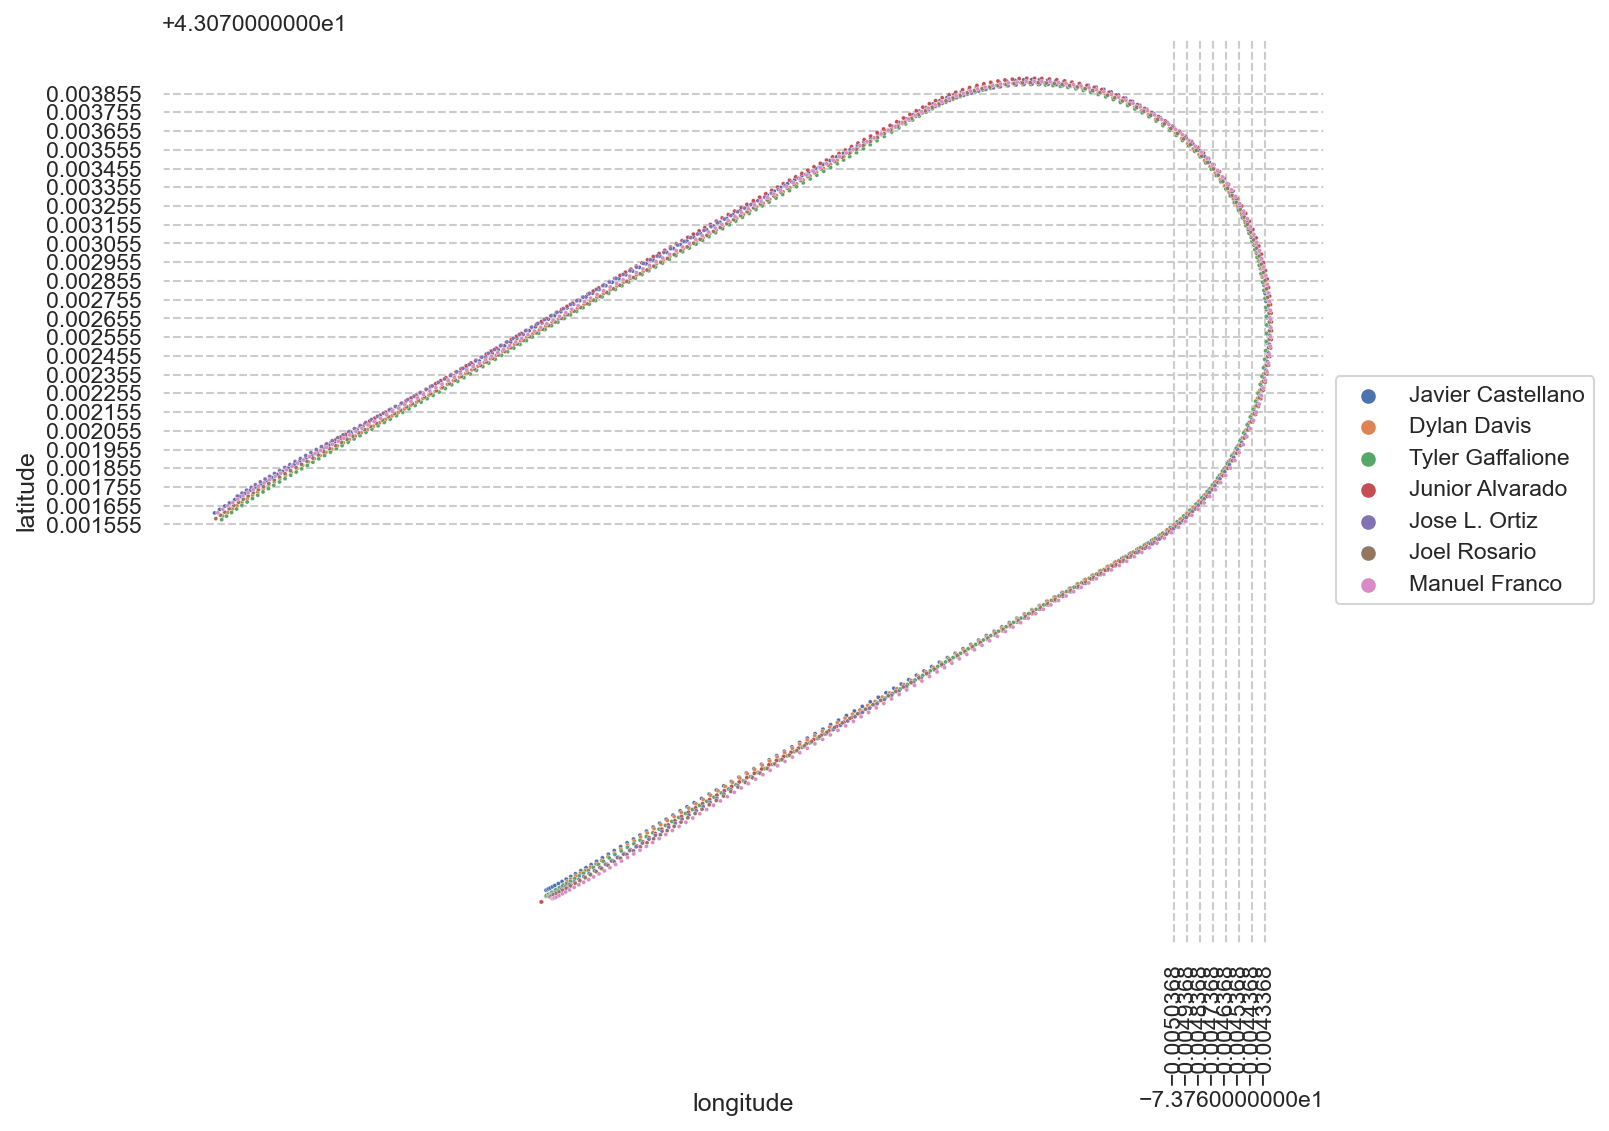

In [116]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.scatterplot(y=sar_race_2['latitude'],x= sar_race_2['longitude'],hue=sar_race_2['jockey'],s=4)
# plt.xticks([])
# plt.yticks([])
# # plt.axis('off')
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.yticks(np.arange(43.071555108, 43.073936729, step=0.0001))
plt.xticks(np.arange( -73.765036784, -73.764324240,step=0.0001),rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig('race_sar.png', bbox_inches='tight')
plt.show()

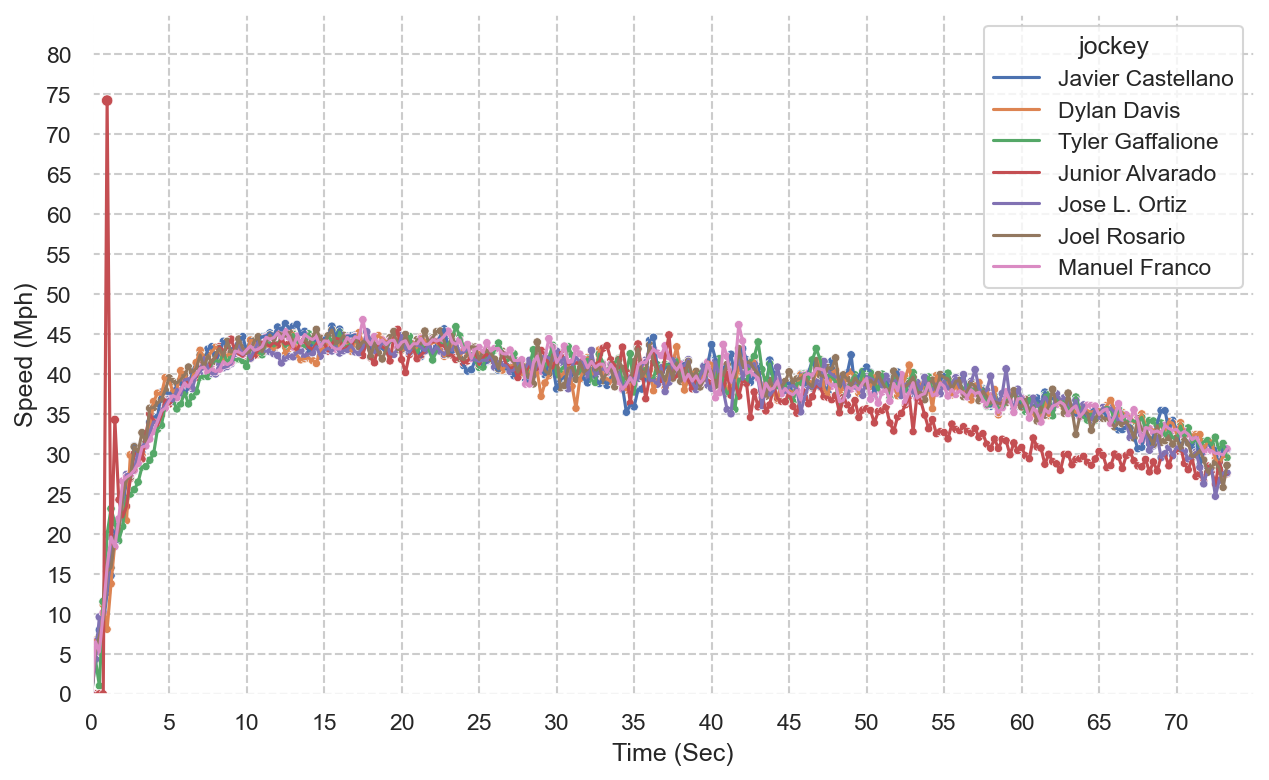

In [124]:

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=sar_race_2['Speed (Mph)'],x= sar_race_2['Time (Sec)'],hue=sar_race_2['jockey'])
# ax = sns.regplot(y=sar_race_2['Speed (Mph)'],x= sar_race_2['Time (Sec)'],scatter=True, truncate=False)
ax = sns.scatterplot(data=sar_race_2, x= sar_race_2['Time (Sec)'], y=sar_race_2['Speed (Mph)'],hue=sar_race_2['jockey'], size="Acceleration", legend=False, sizes=(5, 30))
# Set axis ranges; by default this will put major ticks every 25.
plt.yticks(np.arange(0, 85, step=5))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(0, 85)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('speed_time_sar.png', bbox_inches='tight')
plt.show()

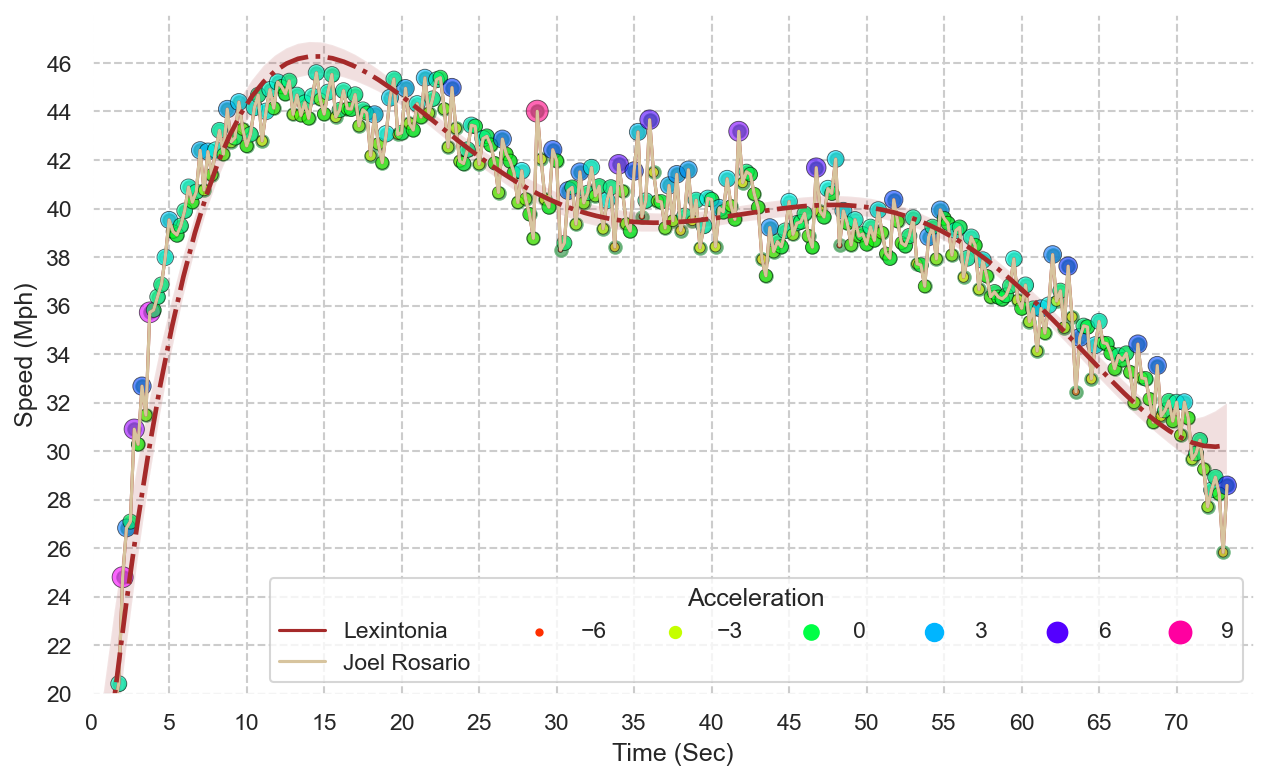

In [154]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'],hue=joel_rosario['horse_name'],palette=['brown'])
ax = sns.lineplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'],hue=joel_rosario['jockey'],palette=['#D7C49EFF'])
ax = sns.regplot(y=joel_rosario['Speed (Mph)'],x= joel_rosario['Time (Sec)'], order=5,line_kws={'color':'brown','linestyle':'-.'})
ax = sns.scatterplot(data=joel_rosario, x= joel_rosario['Time (Sec)'], y=joel_rosario['Speed (Mph)'],hue=joel_rosario['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=True)

plt.yticks(np.arange(0, 48, step=2))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(20, 48)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.legend(loc='lower right',ncol=7,title="Acceleration")

plt.savefig('joel_rosario_sar.png', bbox_inches='tight')
plt.show()

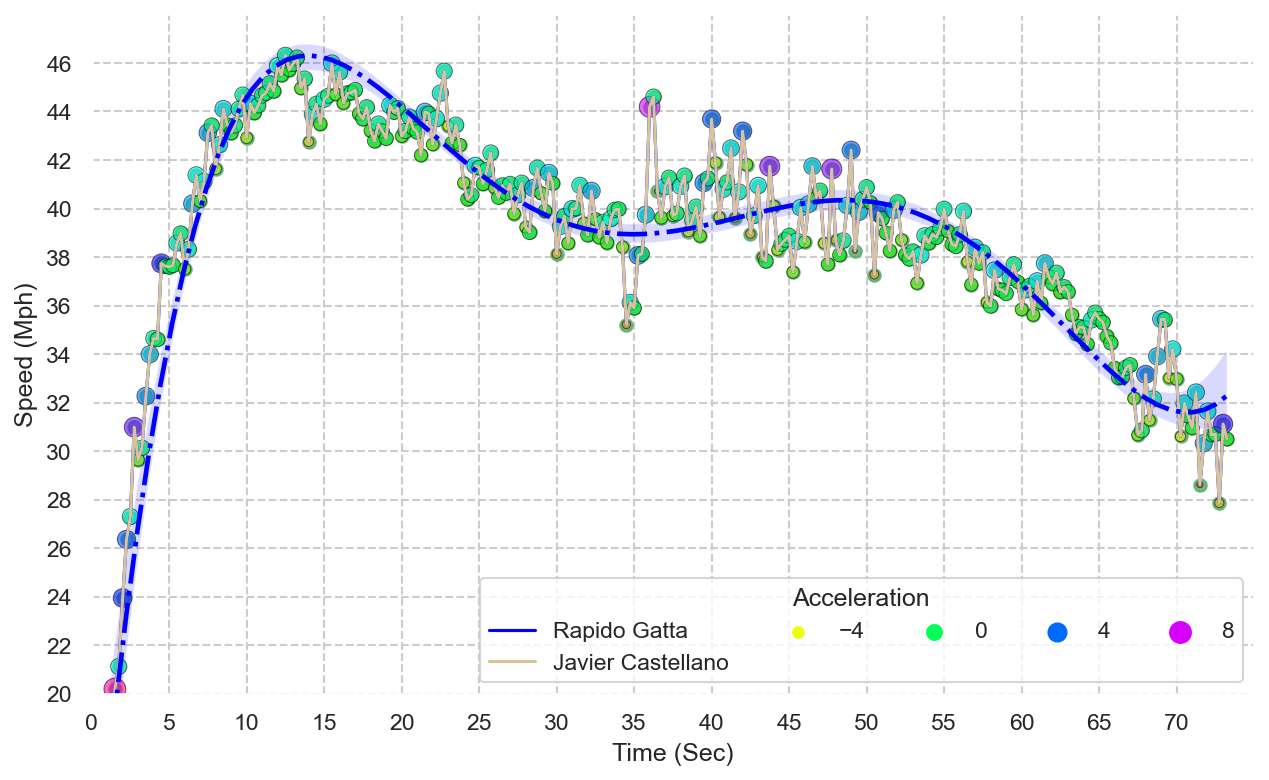

In [161]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'],hue=javier_castellano['horse_name'],palette=['blue'])
ax = sns.lineplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'],hue=javier_castellano['jockey'],palette=['#D7C49EFF'])
ax = sns.regplot(y=javier_castellano['Speed (Mph)'],x= javier_castellano['Time (Sec)'], order=5,line_kws={'color':'blue','linestyle':'-.'})
ax = sns.scatterplot(data=javier_castellano, x= javier_castellano['Time (Sec)'], y=javier_castellano['Speed (Mph)'],hue=javier_castellano['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=True)

plt.yticks(np.arange(0, 48, step=2))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(20, 48)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.legend(loc='lower right',ncol=5,title="Acceleration")

plt.savefig('javier_castellano_sar.png', bbox_inches='tight')
plt.show()


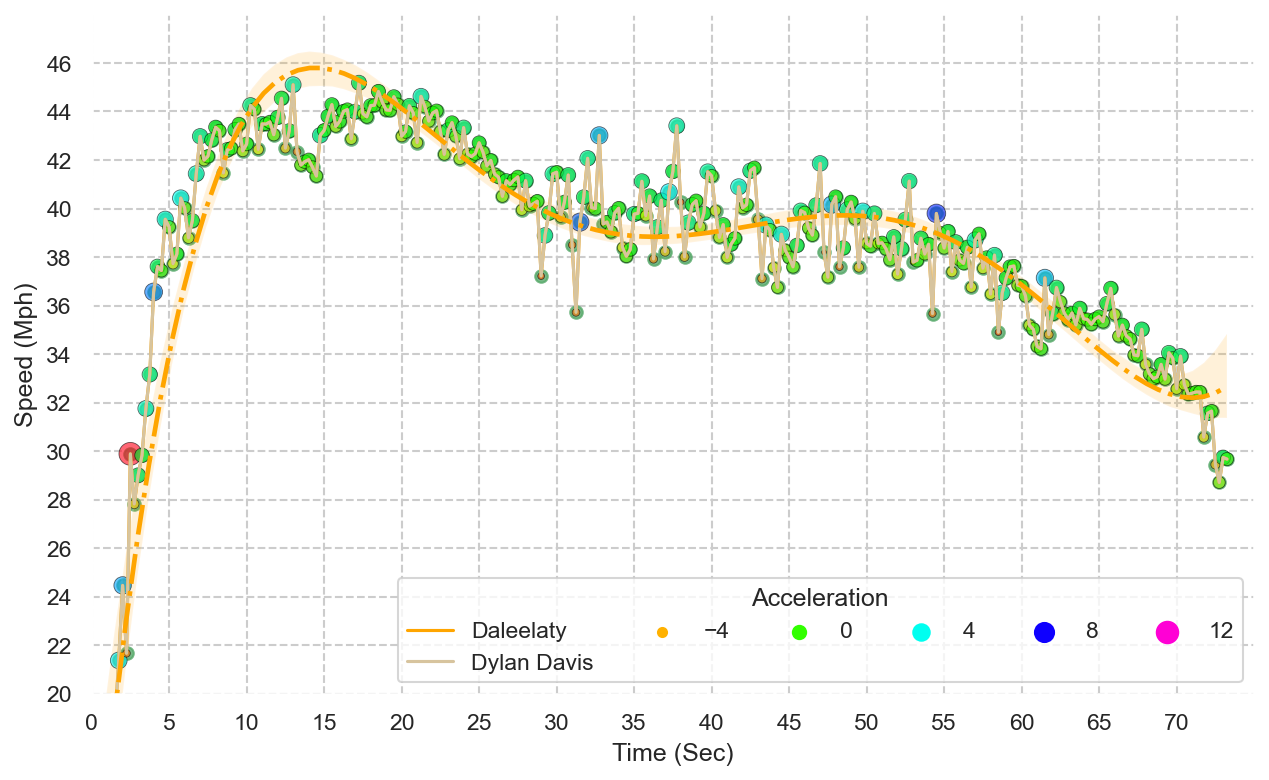

In [156]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=dylan_davis['Speed (Mph)'],x= dylan_davis['Time (Sec)'],hue=dylan_davis['horse_name'],palette=['orange'])
ax = sns.lineplot(y=dylan_davis['Speed (Mph)'],x= dylan_davis['Time (Sec)'],hue=dylan_davis['jockey'],palette=['#D7C49EFF'])
ax = sns.regplot(data=dylan_davis,y=dylan_davis['Speed (Mph)'],x= dylan_davis['Time (Sec)'], order=5,line_kws={'color':'orange','linestyle':'-.'})
ax = sns.scatterplot(data=dylan_davis, x= dylan_davis['Time (Sec)'], y=dylan_davis['Speed (Mph)'],hue=dylan_davis['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=True)
plt.yticks(np.arange(0, 48, step=2))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(20, 48)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.legend(loc='lower right',ncol=6,title="Acceleration")

plt.savefig('dylan_davis_sar.png', bbox_inches='tight')
plt.show()

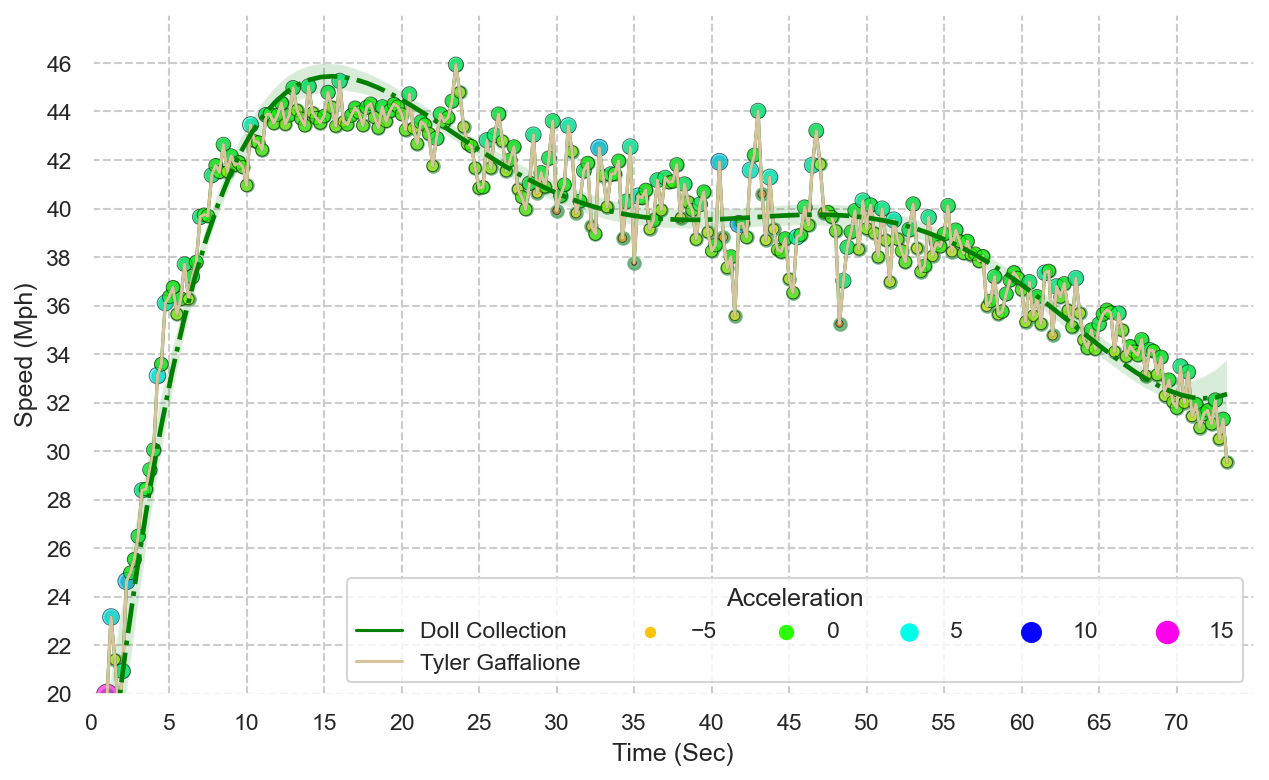

In [157]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=tyler_gaffalione['Speed (Mph)'],x= tyler_gaffalione['Time (Sec)'],hue=tyler_gaffalione['horse_name'],palette=['green'])
ax = sns.lineplot(y=tyler_gaffalione['Speed (Mph)'],x= tyler_gaffalione['Time (Sec)'],hue=tyler_gaffalione['jockey'],palette=['#D7C49EFF'])
ax = sns.regplot(data=tyler_gaffalione,y=tyler_gaffalione['Speed (Mph)'],x= tyler_gaffalione['Time (Sec)'], order=5,line_kws={'color':'green','linestyle':'-.'})
ax = sns.scatterplot(data=tyler_gaffalione, x= tyler_gaffalione['Time (Sec)'], y=tyler_gaffalione['Speed (Mph)'],hue=tyler_gaffalione['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=True)
plt.yticks(np.arange(0, 48, step=2))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(20, 48)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.legend(loc='lower right',ncol=6,title="Acceleration")

plt.savefig('tyler_gaffalione_sar.png', bbox_inches='tight')
plt.show()

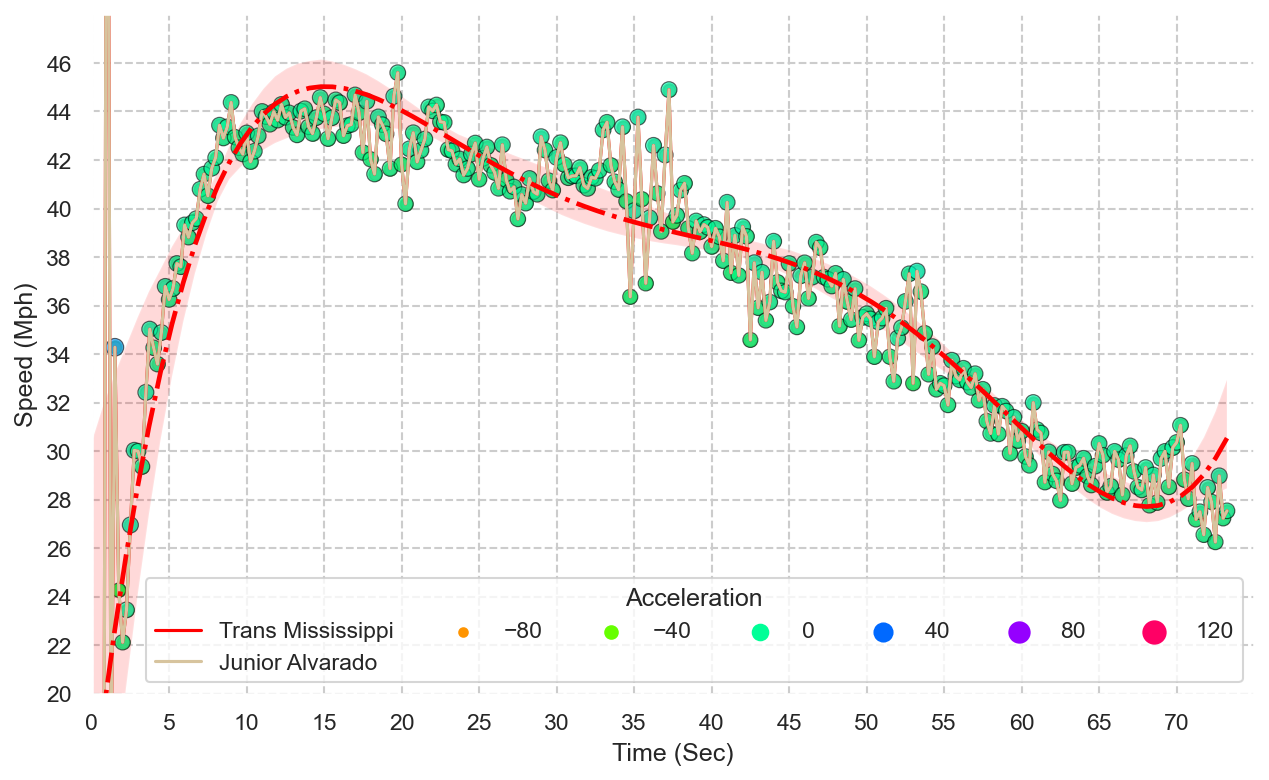

In [158]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=junior_alvarado['Speed (Mph)'],x= junior_alvarado['Time (Sec)'],hue=junior_alvarado['horse_name'],palette=['red'])
ax = sns.lineplot(y=junior_alvarado['Speed (Mph)'],x= junior_alvarado['Time (Sec)'],hue=junior_alvarado['jockey'],palette=['#D7C49EFF'])
ax = sns.regplot(data=junior_alvarado,y=junior_alvarado['Speed (Mph)'],x= junior_alvarado['Time (Sec)'], order=5,line_kws={'color':'red','linestyle':'-.'})
ax = sns.scatterplot(data=junior_alvarado, x= junior_alvarado['Time (Sec)'], y=junior_alvarado['Speed (Mph)'],hue=junior_alvarado['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=True)
# Set axis ranges; by default this will put major ticks every 25.

plt.yticks(np.arange(0, 48, step=2))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(20, 48)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.legend(loc='lower right',ncol=7,title="Acceleration")
plt.savefig('junior_alvarado_sar.png', bbox_inches='tight')
plt.show()

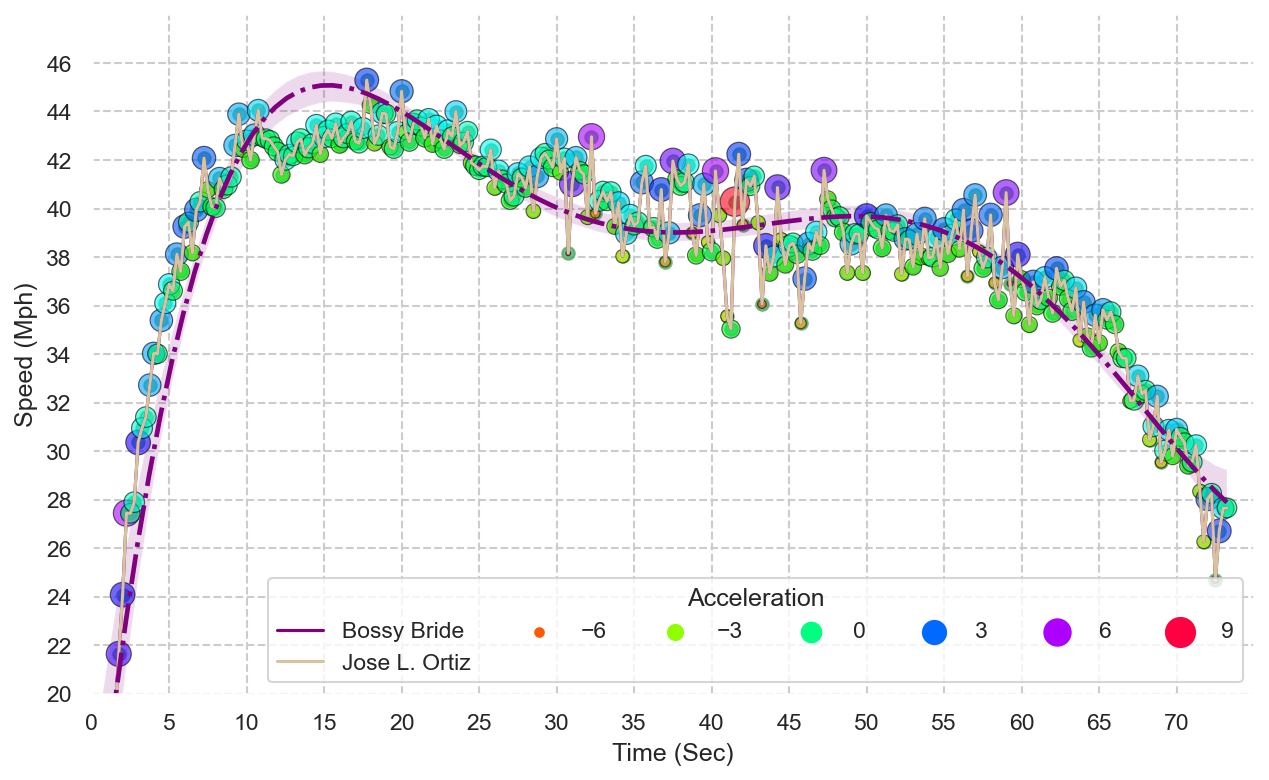

In [159]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=jose_ortiz['Speed (Mph)'],x= jose_ortiz['Time (Sec)'],hue=jose_ortiz['horse_name'],palette=['purple'])
ax = sns.lineplot(y=jose_ortiz['Speed (Mph)'],x= jose_ortiz['Time (Sec)'],hue=jose_ortiz['jockey'],palette=['#D7C49EFF'])
ax = sns.regplot(data=jose_ortiz,y=jose_ortiz['Speed (Mph)'],x= jose_ortiz['Time (Sec)'], order=5,line_kws={'color':'purple','linestyle':'-.'})
ax = sns.scatterplot(data=jose_ortiz, x= jose_ortiz['Time (Sec)'], y=jose_ortiz['Speed (Mph)'],hue=jose_ortiz['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,200),legend=True)

plt.yticks(np.arange(0, 48, step=2))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(20, 48)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.legend(loc='lower right',ncol=7,title="Acceleration")
plt.savefig('jose_ortiz_sar.png', bbox_inches='tight')
plt.show()

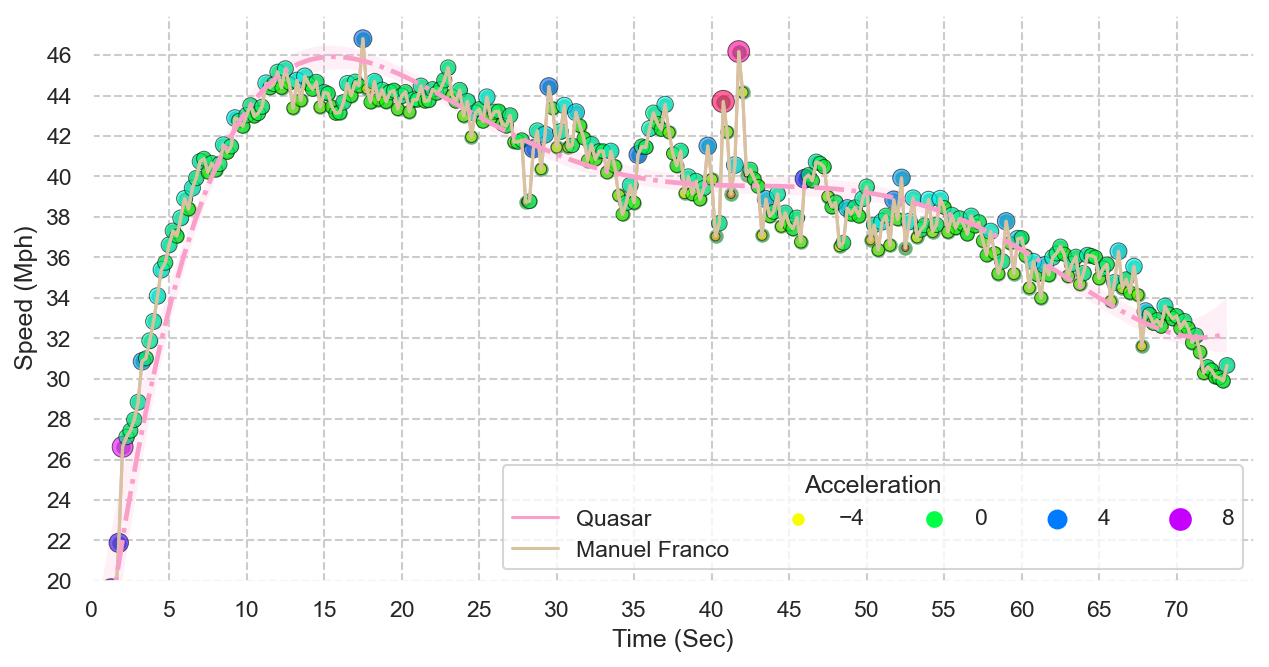

In [160]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'],hue=manuel_franco['horse_name'],palette=['#F99FC9FF'])
ax = sns.lineplot(y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'],hue=manuel_franco['jockey'],palette=['#D7C49EFF'])
ax = sns.regplot(data=manuel_franco,y=manuel_franco['Speed (Mph)'],x= manuel_franco['Time (Sec)'], order=5,line_kws={'color':'#F99FC9FF','linestyle':'-.'})
ax = sns.scatterplot(data=manuel_franco, x= manuel_franco['Time (Sec)'], y=manuel_franco['Speed (Mph)'],hue=manuel_franco['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=True)

plt.yticks(np.arange(0, 48, step=2))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(20, 48)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.legend(loc='lower right',ncol=5,title="Acceleration")

plt.savefig('manuel_franco_sar.png', bbox_inches='tight')
plt.show()

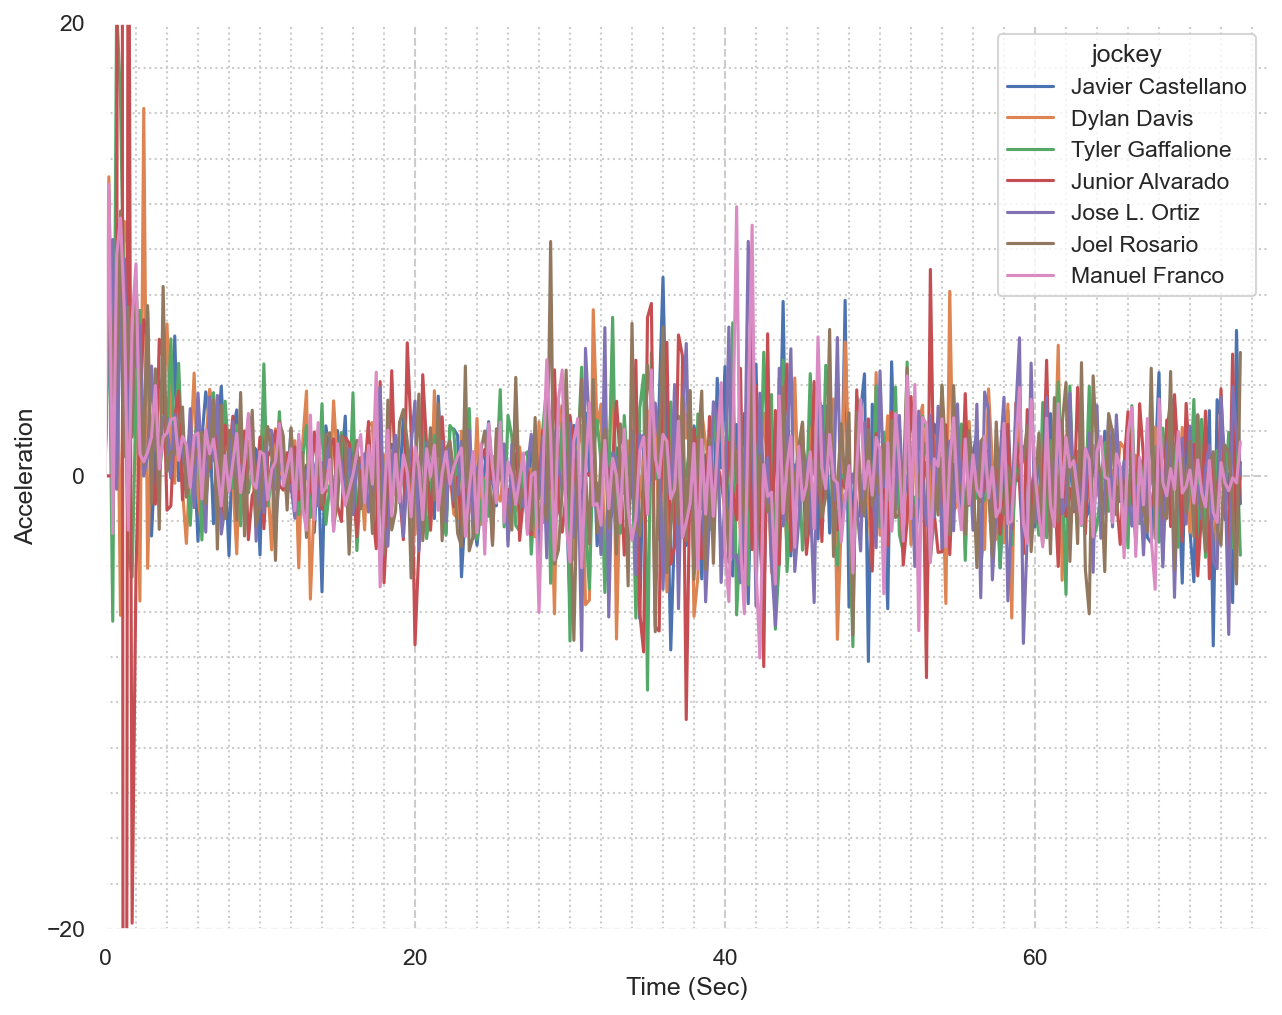

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(y=sar_race_2['Acceleration'],x= sar_race_2['Time (Sec)'],hue=sar_race_2['jockey'])
# Set axis ranges; by default this will put major ticks every 25.
ax.set_xlim(0, 75)
ax.set_ylim(-20, 20)

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_major_locator(MultipleLocator(20))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('acc_sar.png', bbox_inches='tight')
plt.show()

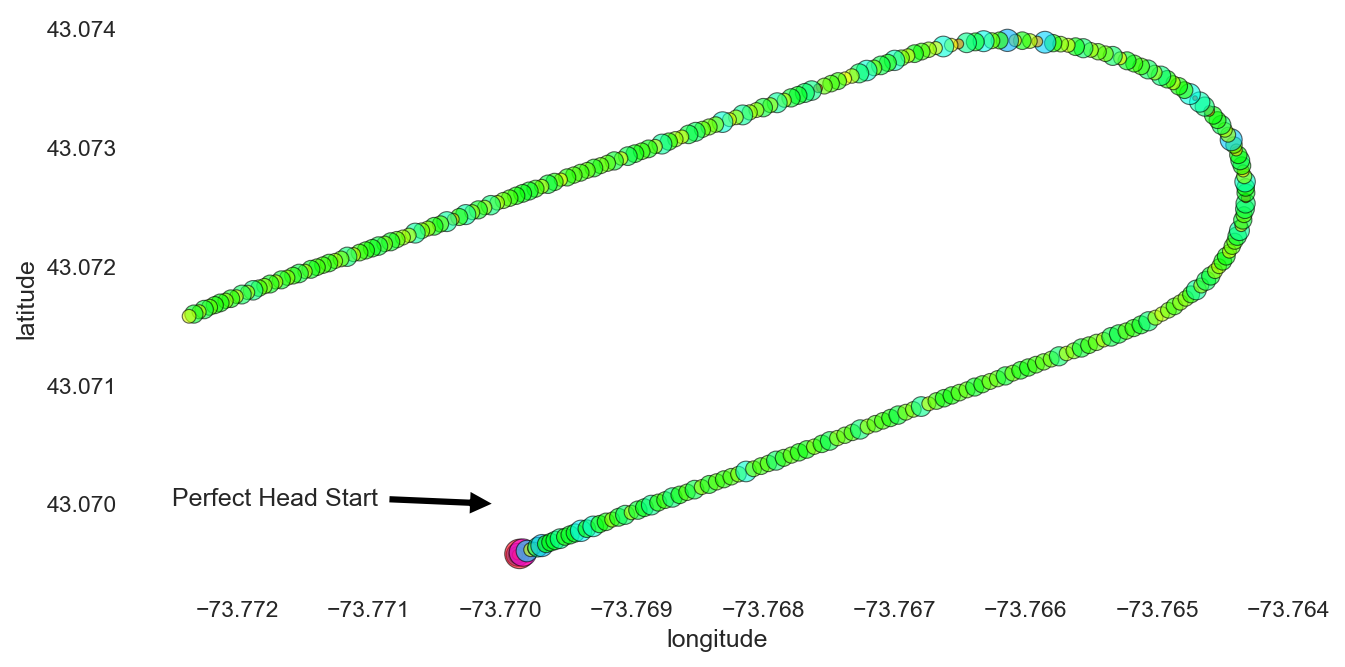

In [20]:
# ax = sns.regplot(data=tyler_gaffalione,y=tyler_gaffalione['latitude'],x=tyler_gaffalione['longitude'],order=10, line_kws={'color':'#F99FC9FF','linestyle':'-.'})
plot = sns.scatterplot(x=tyler_gaffalione['longitude'], y=tyler_gaffalione['latitude'],hue=tyler_gaffalione['Acceleration'],palette='hsv',alpha=0.6, ec='black', size=tyler_gaffalione['Acceleration'],
               sizes=(5,200),legend=None)
plot.annotate('Perfect Head Start', xy=(-73.770, 43.070), xytext=(-73.7725, 43.06999), fontsize=12,
              arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [ ]:
# from math import radians, cos, sin, asin, sqrt
# def dist(lat1, long1, lat2, long2):
#     # convert decimal degrees to radians 
#     lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
#     # haversine formula 
#     dlon = long2 - long1 
#     dlat = lat2 - lat1 
#     a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
#     c = 2 * asin(sqrt(a)) 
#     # Radius of earth in kilometers is 6371
#     furlong = 31710* c
#     return furlong

In [ ]:
# def find_nearest(lat, long):
#     distances = sar_race_2.apply(
#         lambda row: dist(lat, long, row['latitude'], row['longitude']), 
#         axis=1)
#     return sar_race_2.loc[distances.idxmin(), 'jockey']

In [ ]:
# tyler_gaffalione['jockey'] = tyler_gaffalione.apply(
#     lambda row: find_nearest(row['latitude'], row['longitude']), 
#     axis=1)
# # To check the data frame if it has a new column of hotel name (for each and every member's location in the list)
# tyler_gaffalione.head()

In [ ]:
# tyler_gaffalione.head().T

In [21]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
%matplotlib qt

fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(x=joel_rosario['longitude'], y=joel_rosario['latitude'],hue=joel_rosario['jockey'],palette=['white'],ec='white',size=joel_rosario['Acceleration'],sizes=(20,800),legend=None)
plt.plot(joel_rosario['longitude'], joel_rosario['latitude'], c= "red",linewidth=4, linestyle='--', label="Joel Rosario")
plt.legend(loc="upper left")


x = javier_castellano['longitude'].to_numpy()
y = javier_castellano['latitude'].to_numpy()
z = javier_castellano['Acceleration'].to_numpy()


sc_1 = ax.scatter([], [])
line, = ax.plot([], [], color="black", zorder=4,label='Javier Castellano',linewidth = 3,linestyle='--')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","white","white","white","white","white","white","white","white","white","white","white"])



def animate(i):
    ## plot scatter point
    sc_1 = sns.scatterplot(x=x[:i], y=y[:i],hue=z[:i],size=z[:i],palette='hsv',ec='white',sizes=(10,400),legend='brief')
    
    ## plot line
    line.set_data(x[:i], y[:i])
    ax.legend(handles=[line],loc='lower right')
    
    return sc_1, line

ani = animation.FuncAnimation(fig=fig,func=animate, interval=100, blit=True, save_count=1500)
plt.axis("off")
plt.show()

In [ ]:
def show_race(df):
    %matplotlib qt
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.scatterplot(x=joel_rosario['longitude'], y=joel_rosario['latitude'],ec='k',size=joel_rosario['Acceleration'],sizes=(5,200),legend=None)
    x = df['longitude'].to_numpy()
    y = df['latitude'].to_numpy()
    z = df['Acceleration'].to_numpy()
    
    sc_1 = ax.scatter([], [])
    line, = ax.plot([], [], color="black", zorder=4)


    def animate(i):
        ## plot scatter point
        sc_1 = sns.scatterplot(x=x[:i], y=y[:i],hue=z[:i],size=z[:i],palette='hsv',sizes=(5,200),legend=None)

        ## plot line
        line.set_data(x[:i], y[:i])

        return sc_1, line
    
    ani = animation.FuncAnimation(fig=fig,func=animate, interval=100, blit=True, save_count=1500)
    plt.axis("off")
    return ani

In [ ]:
def show_speed(df):
    %matplotlib qt
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    
    plt.yticks(np.arange(0, 55, step=5))
    plt.xticks(np.arange(0, 75, step=5))
    
    
    # plt.xlim((0, 75))
    # plt.ylim((0,55))
    
    x = joel_rosario['Time (Sec)'].to_numpy()
    y = joel_rosario['Speed (Mph)'].to_numpy()
    z = joel_rosario['Acceleration'].to_numpy()
    
    sc_1 = ax.scatter([], [])
    line, = ax.plot([], [], color="black", zorder=4)


    def animate(i):
        ## plot scatter point
        sc_1 = sns.scatterplot(x=x[:i], y=y[:i],hue=z[:i],size=z[:i],palette='hsv',sizes=(5,200),legend=None)

        ## plot line
        line.set_data(x[:i], y[:i])
        
        ax.relim()
        ax.autoscale_view()

        return sc_1, line
    
    ani = animation.FuncAnimation(fig=fig,func=animate, interval=100, blit=True)
    return ani

In [ ]:
ani_race = show_race(jose_ortiz)
plt.show()

In [ ]:
ani = show_speed(jose_ortiz)
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# %matplotlib qt

# lat = manuel_franco['longitude'].to_numpy()
# log = manuel_franco['latitude'].to_numpy()
# h = manuel_franco['Acceleration'].to_numpy()
# a = manuel_franco['Acceleration'].to_numpy()

# # x_start = manuel_franco['longitude'].min()
# # y_start = manuel_franco['latitude'].min()
# # x_end = manuel_franco['longitude'].max()
# # y_end = manuel_franco['latitude'].max()

# sc_11 = ax.scatter([], [])
# line_12 = ax.plot([], [], color="black", zorder=4)

# plt.xlim((-74, -73))
# plt.ylim((42,43))

# def my_ani(i):
#     sc_11 = sns.scatterplot(x=lat[:i], y=log[:i],hue=h[:i],palette='hsv',alpha=0.6, ec='black', size=a[:i], sizes=(5,200),legend=None)
#     return sc_11

# ani = animation.FuncAnimation(fig=fig, func=my_ani, interval=100, blit=True, save_count=50)
# plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib qt

fig, ax = plt.subplots(figsize=(10, 5))

plt.yticks(np.arange(0, 55, step=5))
plt.xticks(np.arange(0, 75, step=5))

plt.xlim((0, 75))
plt.ylim((0,55))

x = joel_rosario['Time (Sec)'].to_numpy()
y = joel_rosario['Speed (Mph)'].to_numpy()
z = joel_rosario['Acceleration'].to_numpy()

sc_1 = ax.scatter([], [])
line, = ax.plot([], [], color="black", zorder=4)


def animate(i):
    ## plot scatter point
    sc_1 = sns.scatterplot(x=x[:i], y=y[:i],hue=z[:i],size=z[:i],palette='hsv',sizes=(5,120),legend=None)
    
    ## plot line
    line.set_data(x[:i], y[:i])
    
    plt.ylabel('Speed (Mph)')
    plt.xlabel('Time (Sec)')
   
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')

    return sc_1, line

ani = animation.FuncAnimation(fig=fig, func=animate, interval=100, blit=False, save_count=50)

plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation


# fig, ax = plt.subplots()

# x_start, y_start = (0, 0)
# x_end, y_end = (90, 90)

# x_1, y_1 = 0, 0
# x_2, y_2 = 90, 90

# plt.xlim((0, 100))
# plt.ylim((0,100))

# x = np.linspace(x_1, x_2, 50)
# y = np.linspace(y_1, y_2, 50)

# sc_1 = ax.scatter([], [], color="green", zorder=4)
# line, = ax.plot([], [], color="crimson", zorder=4)
# sc_2 = ax.scatter([], [], color="gold", zorder=4)


# def animate(i):
#     ## plot scatter point
#     sc_1.set_offsets([x_start, y_start])

#     ## plot line
#     line.set_data(x[:i], y[:i])

#     ## plot scatter point
#     if i == len(x):
#         sc_2.set_offsets([x_end, y_end])

#     return sc_1, line, sc_2

# ani = animation.FuncAnimation(
#     fig=fig, func=animate, interval=100, blit=True, save_count=50)

# plt.show()

In [2]:
race_1_csv = pd.read_csv('/Users/kushtrivedi/Desktop/NYRA/AQU/Mar/Day9/race1.csv')

In [28]:
race_1_csv.head().T

0             1             2             3  \
Unnamed: 0                      0             1             2             3   
track_id                      AQU           AQU           AQU           AQU   
race_date              2019-03-09    2019-03-09    2019-03-09    2019-03-09   
race_number                     1             1             1             1   
program_number                  1             1             1             1   
trakus_index                    1             2             3             4   
latitude                40.670263     40.670277     40.670294     40.670312   
longitude              -73.828816     -73.82881    -73.828803    -73.828796   
course_type                     D             D             D             D   
track_condition               FT            FT            FT            FT    
run_up_distance                45            45            45            45   
race_type                     MSW           MSW           MSW           MSW   
purse                       60000         60000         60000         60000   
post_time                    1221          1221          1221          1221   
weight_carried                120           120           120           120   
jockey               Rajiv Maragh  Rajiv Maragh  Rajiv Maragh  Rajiv Maragh   
american_odds                 710           710           710           710   
finishing_place                 5             5             5             5   
horse_name            Noble Cause   Noble Cause   Noble Cause   Noble Cause   
furlongs                      6.0           6.0           6.0           6.0   
new_odds                    7.1-1         7.1-1         7.1-1         7.1-1   
implied_probability         12.35         12.35         12.35         12.35   
average_temperature          75.5          75.5          75.5          75.5   
rating                          6             6             6             6   
Time (Sec)                    0.0          0.25           0.5          0.75   
Speed (Mph)                   0.0     14.994009     17.661653     18.935759   
Acceleration                  0.0     26.811687      4.770175      2.278306   
Time_Took_1              1.114702      1.114702      1.114702      1.114702   
Time_Took_2              0.012667      0.012667      0.012667      0.012667   
Time_Took                1.102035      1.102035      1.102035      1.102035   

                                4  
Unnamed: 0                      4  
track_id                      AQU  
race_date              2019-03-09  
race_number                     1  
program_number                  1  
trakus_index                    5  
latitude                40.670333  
longitude              -73.828788  
course_type                     D  
track_condition               FT   
run_up_distance                45  
race_type                     MSW  
purse                       60000  
post_time                    1221  
weight_carried                120  
jockey               Rajiv Maragh  
american_odds                 710  
finishing_place                 5  
horse_name            Noble Cause  
furlongs                      6.0  
new_odds                    7.1-1  
implied_probability         12.35  
average_temperature          75.5  
rating                          6  
Time (Sec)                    1.0  
Speed (Mph)             21.489194  
Acceleration              4.56595  
Time_Took_1              1.114702  
Time_Took_2              0.012667  
Time_Took                1.102035

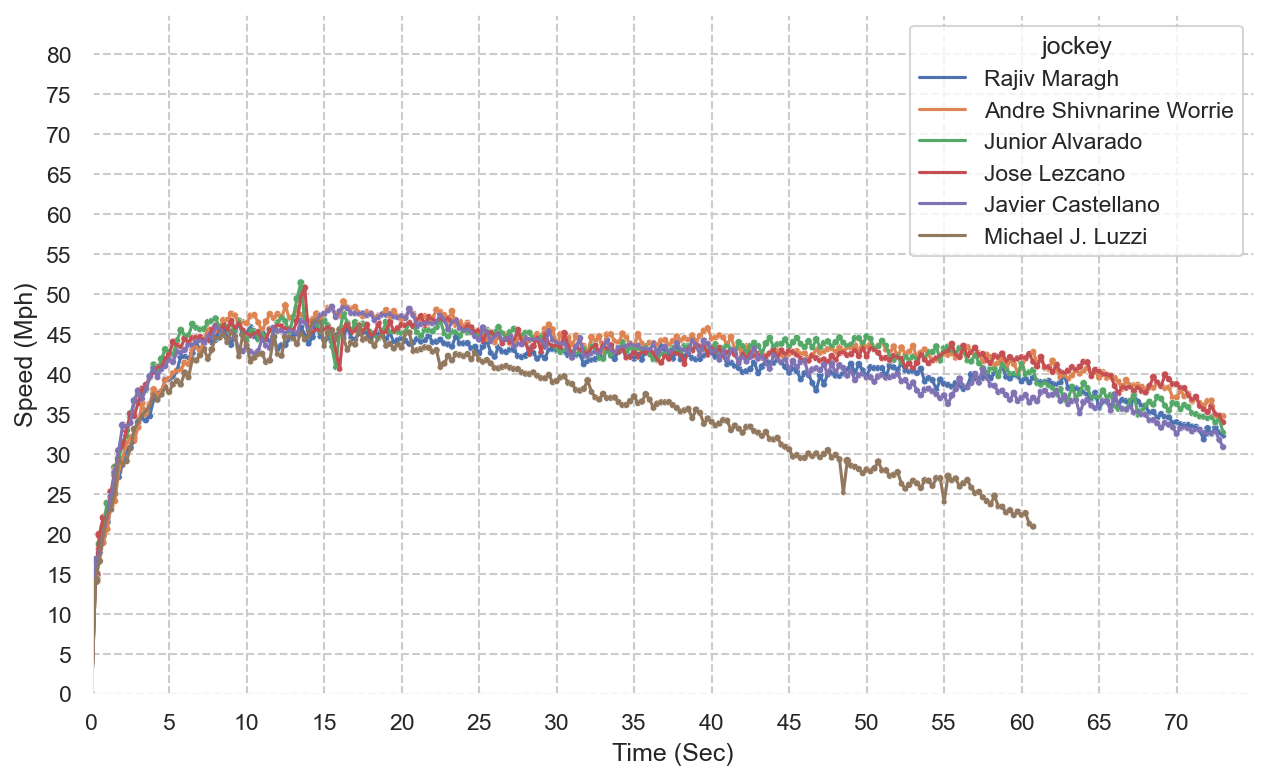

In [6]:

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=race_1_csv['Speed (Mph)'],x= race_1_csv['Time (Sec)'],hue=race_1_csv['jockey'])
# ax = sns.regplot(y=sar_race_2['Speed (Mph)'],x= sar_race_2['Time (Sec)'],scatter=True, truncate=False)
ax = sns.scatterplot(data=race_1_csv, x= race_1_csv['Time (Sec)'], y=race_1_csv['Speed (Mph)'],hue=race_1_csv['jockey'], size="Acceleration", legend=False, sizes=(5, 30))
# Set axis ranges; by default this will put major ticks every 25.
plt.yticks(np.arange(0, 85, step=5))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(0, 85)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('speed_time_sar.png', bbox_inches='tight')
plt.show()

In [3]:
rajiv_maragh = race_1_csv[(race_1_csv.jockey == 'Rajiv Maragh')]
andre_shivnarine_worrie = race_1_csv[(race_1_csv.jockey == 'Andre Shivnarine Worrie')]
junior_alvarado = race_1_csv[(race_1_csv.jockey == 'Junior Alvarado')]
jose_lezcano = race_1_csv[(race_1_csv.jockey == 'Jose Lezcano')]
javier_castellano = race_1_csv[(race_1_csv.jockey == 'Javier Castellano')]
michael_j_luzzi = race_1_csv[(race_1_csv.jockey == 'Michael J. Luzzi')]

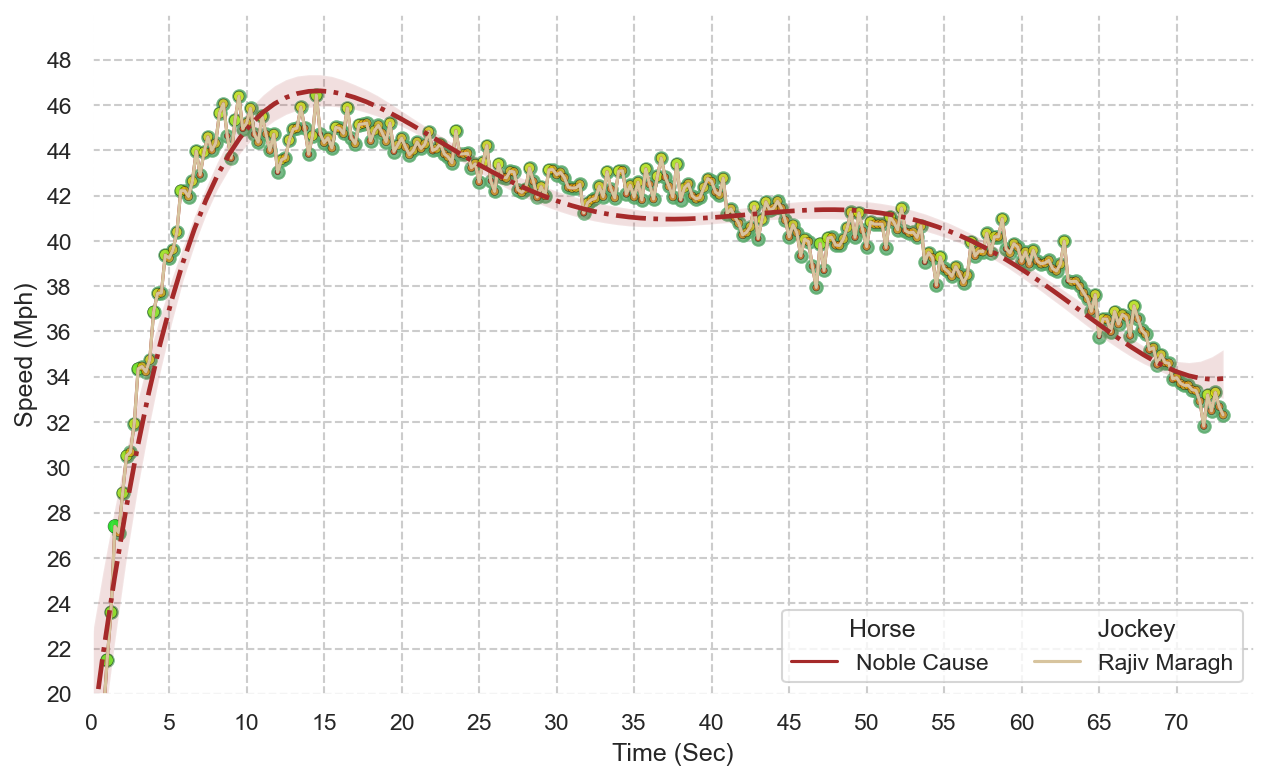

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=rajiv_maragh['Speed (Mph)'],x= rajiv_maragh['Time (Sec)'],hue=rajiv_maragh['horse_name'],palette=['brown'])
ax = sns.lineplot(y=rajiv_maragh['Speed (Mph)'],x= rajiv_maragh['Time (Sec)'],hue=rajiv_maragh['jockey'],palette=['#D7C49EFF'])
ax = sns.regplot(y=rajiv_maragh['Speed (Mph)'],x= rajiv_maragh['Time (Sec)'], order=5,line_kws={'color':'brown','linestyle':'-.'})
ax = sns.scatterplot(data=rajiv_maragh, x= rajiv_maragh['Time (Sec)'], y=rajiv_maragh['Speed (Mph)'],hue=rajiv_maragh['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=False)

plt.yticks(np.arange(0, 50, step=2))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(20, 50)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.legend(loc='lower right',ncol=5,title="Horse                          Jockey")

plt.savefig('rajiv_maragh.png', bbox_inches='tight')
plt.show()

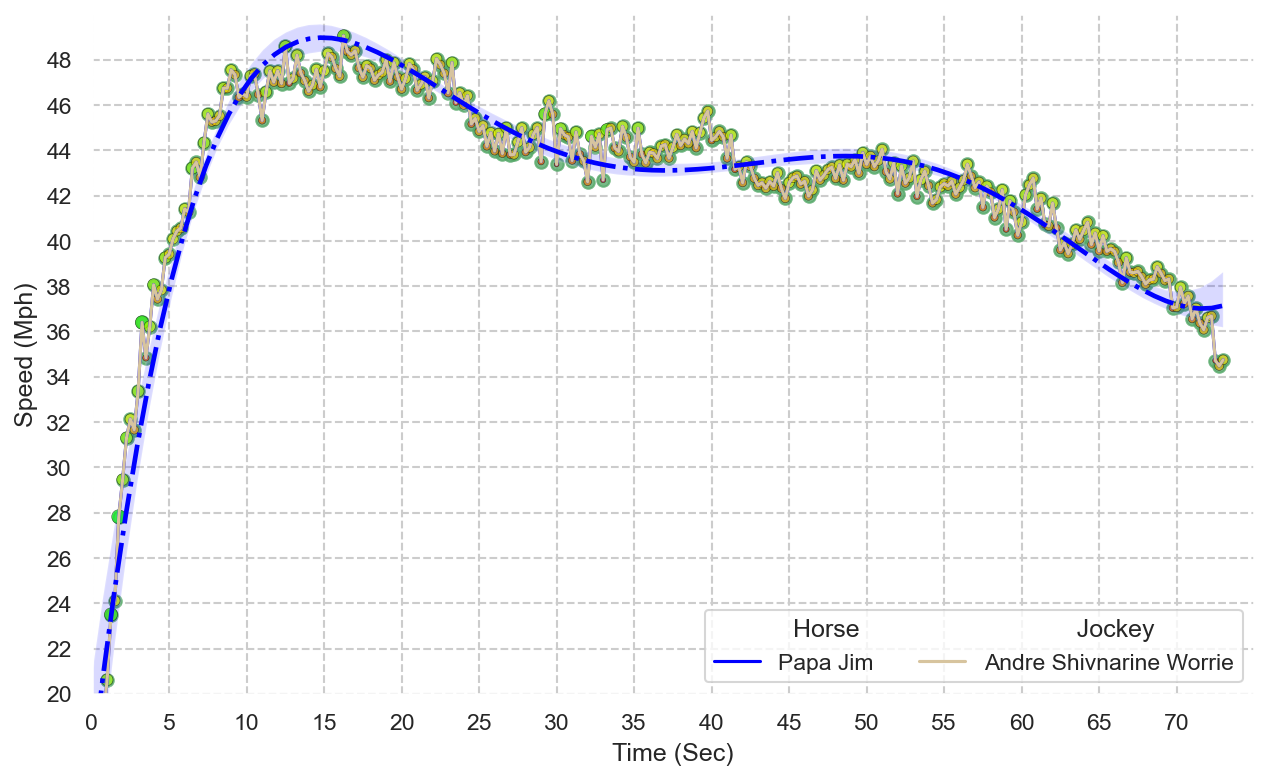

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=andre_shivnarine_worrie['Speed (Mph)'],x= andre_shivnarine_worrie['Time (Sec)'],hue=andre_shivnarine_worrie['horse_name'],palette=['blue'])
ax = sns.lineplot(y=andre_shivnarine_worrie['Speed (Mph)'],x= andre_shivnarine_worrie['Time (Sec)'],hue=andre_shivnarine_worrie['jockey'],palette=['#D7C49EFF'])
ax = sns.regplot(y=andre_shivnarine_worrie['Speed (Mph)'],x= andre_shivnarine_worrie['Time (Sec)'], order=5,line_kws={'color':'blue','linestyle':'-.'})
ax = sns.scatterplot(data=andre_shivnarine_worrie, x= andre_shivnarine_worrie['Time (Sec)'], y=andre_shivnarine_worrie['Speed (Mph)'],hue=andre_shivnarine_worrie['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=False)

plt.yticks(np.arange(0, 50, step=2))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(20, 50)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.legend(loc='lower right',ncol=5,title="Horse                               Jockey")

plt.savefig('andre_shivnarine_worrie.png', bbox_inches='tight')
plt.show()

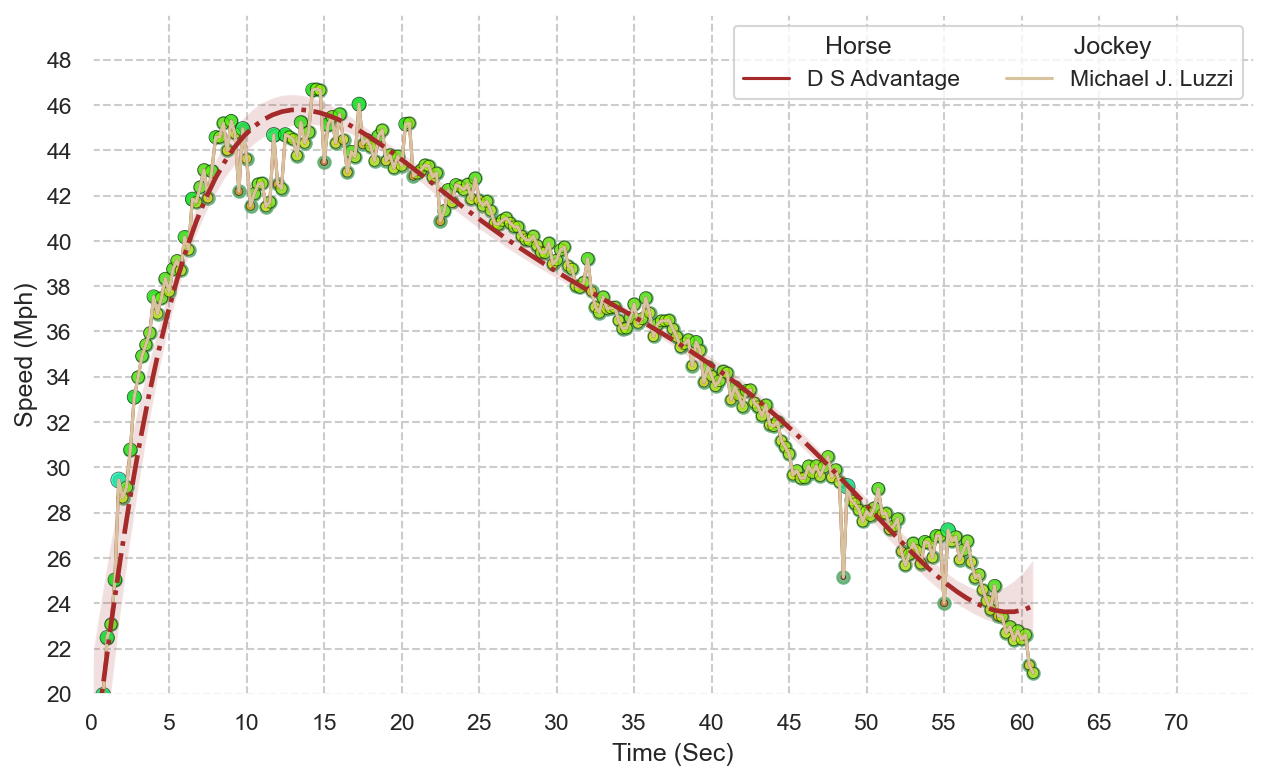

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(y=michael_j_luzzi['Speed (Mph)'],x= michael_j_luzzi['Time (Sec)'],hue=michael_j_luzzi['horse_name'],palette=['brown'])
ax = sns.lineplot(y=michael_j_luzzi['Speed (Mph)'],x= michael_j_luzzi['Time (Sec)'],hue=michael_j_luzzi['jockey'],palette=['#D7C49EFF'])
ax = sns.regplot(y=michael_j_luzzi['Speed (Mph)'],x= michael_j_luzzi['Time (Sec)'], order=5,line_kws={'color':'brown','linestyle':'-.'})
ax = sns.scatterplot(data=michael_j_luzzi, x= michael_j_luzzi['Time (Sec)'], y=michael_j_luzzi['Speed (Mph)'],hue=michael_j_luzzi['Acceleration'],palette='hsv',alpha=0.6, ec='black', size="Acceleration", sizes=(5,120),legend=False)

plt.yticks(np.arange(0, 50, step=2))
plt.xticks(np.arange(0, 75, step=5))

ax.set_xlim(0, 75)
ax.set_ylim(20, 50)

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.legend(loc='upper right',ncol=5,title="Horse                          Jockey")

plt.savefig('rajiv_maragh.png', bbox_inches='tight')
plt.show()

In [ ]:
df[df.last_valid_index()-pandas.DateOffset(30, 'D'):]